# Import Libraries

In [2]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


# Import Data

In [3]:
#Import Data using yahoo finance api

import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_analysts_info

In [13]:
amazon_analysts_info = get_analysts_info("amzn")
amazon_analysts_info

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2020)  Next Qtr. (Mar 2021)  \
 0   No. of Analysts                    40.00                 29.00   
 1     Avg. Estimate                     7.17                  9.02   
 2      Low Estimate                     4.51                  4.12   
 3     High Estimate                    11.16                 11.58   
 4      Year Ago EPS                     6.47                  5.01   
 
    Current Year (2020)  Next Year (2021)  
 0                45.00             47.00  
 1                34.93             45.54  
 2                32.20             34.03  
 3                38.89             63.03  
 4                23.01             34.93  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2020) Next Qtr. (Mar 2021)  \
 0          No. of Analysts                      40                   29   
 1            Avg. Estimate                 119.61B               95.31B   
 2             Low Estimate           

In [15]:
from yahoo_fin.stock_info import get_quote_table

In [16]:
get_quote_table("amzn")

{'1y Target Est': 3833.29,
 '52 Week Range': '1,626.03 - 3,552.25',
 'Ask': '3,294.35 x 900',
 'Avg. Volume': 4128900.0,
 'Beta (5Y Monthly)': 1.2,
 'Bid': '3,293.50 x 800',
 "Day's Range": '3,243.15 - 3,363.89',
 'EPS (TTM)': 34.2,
 'Earnings Date': 'Feb 02, 2021',
 'Ex-Dividend Date': nan,
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '1.656T',
 'Open': 3328.5,
 'PE Ratio (TTM)': 96.49,
 'Previous Close': 3292.23,
 'Quote Price': 3300.300048828125,
 'Volume': 3243751.0}

In [7]:
from yahoo_fin.stock_info import get_data

In [41]:
#daily stock info for amazon 
amazon_daily = get_data("amzn", start_date="1/1/2011", end_date="1/21/2021",
                        index_as_date=True, interval="1d")
amazon_daily

,open,high,low,close,adjclose,volume,ticker
2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400,AMZN
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800,AMZN
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,AMZN
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,AMZN
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,AMZN
...,...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,AMZN
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800,AMZN
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900,AMZN
2020-12-30,3341.000000,3342.100098,3282.469971,3285.850098,3285.850098,3209300,AMZN


## Stock EDA

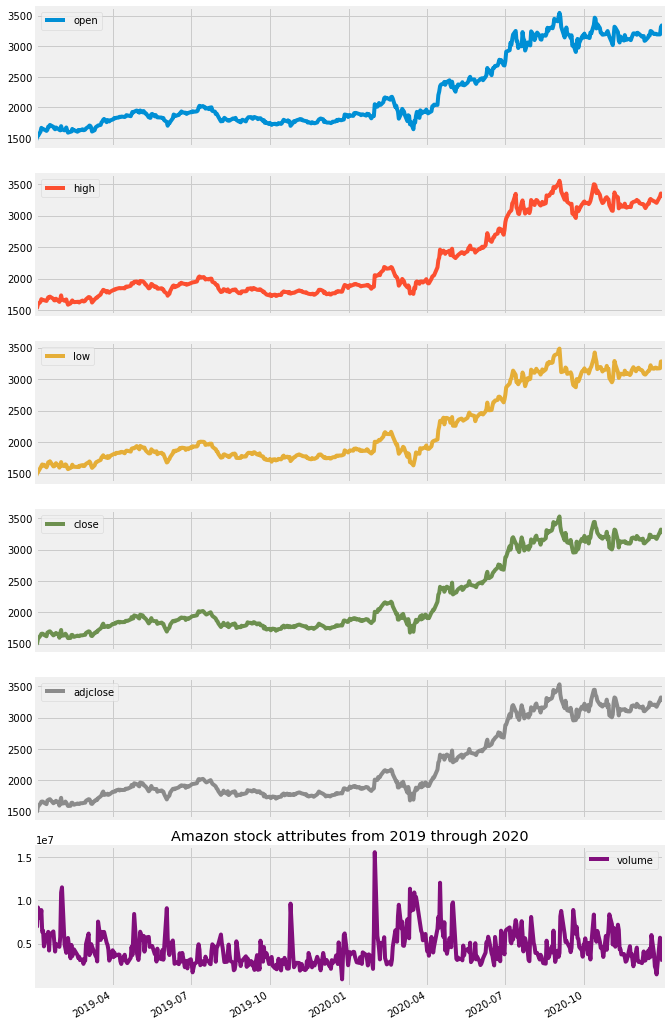

In [54]:
amazon_daily['2019':'2020'].plot(subplots=True, figsize=(10,20))
plt.title('Amazon stock attributes from 2019 through 2020')
plt.show()

In [47]:
amazon_daily.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=2517, freq=None)

In [50]:
#daily stock info for amazon 
amazon_monthly = get_data("amzn", start_date="1/1/2011", end_date="1/1/2021",
                        index_as_date=True, interval="1mo")
amazon_monthly

,open,high,low,close,adjclose,volume,ticker
2011-01-01,181.369995,191.600006,166.899994,169.639999,169.639999,113611300,AMZN
2011-02-01,170.520004,191.399994,169.509995,173.289993,173.289993,95776400,AMZN
2011-03-01,173.529999,181.570007,160.589996,180.130005,180.130005,118979100,AMZN
2011-04-01,181.580002,197.800003,175.369995,195.809998,195.809998,116749400,AMZN
2011-05-01,196.570007,206.389999,190.880005,196.690002,196.690002,106274500,AMZN
...,...,...,...,...,...,...,...
2020-08-01,3180.510010,3495.000000,3073.000000,3450.959961,3450.959961,83528700,AMZN
2020-09-01,3489.580078,3552.250000,2871.000000,3148.729980,3148.729980,115930800,AMZN
2020-10-01,3208.000000,3496.239990,3019.000000,3036.149902,3036.149902,116242300,AMZN
2020-11-01,3061.739990,3366.800049,2950.120117,3168.040039,3168.040039,90810500,AMZN


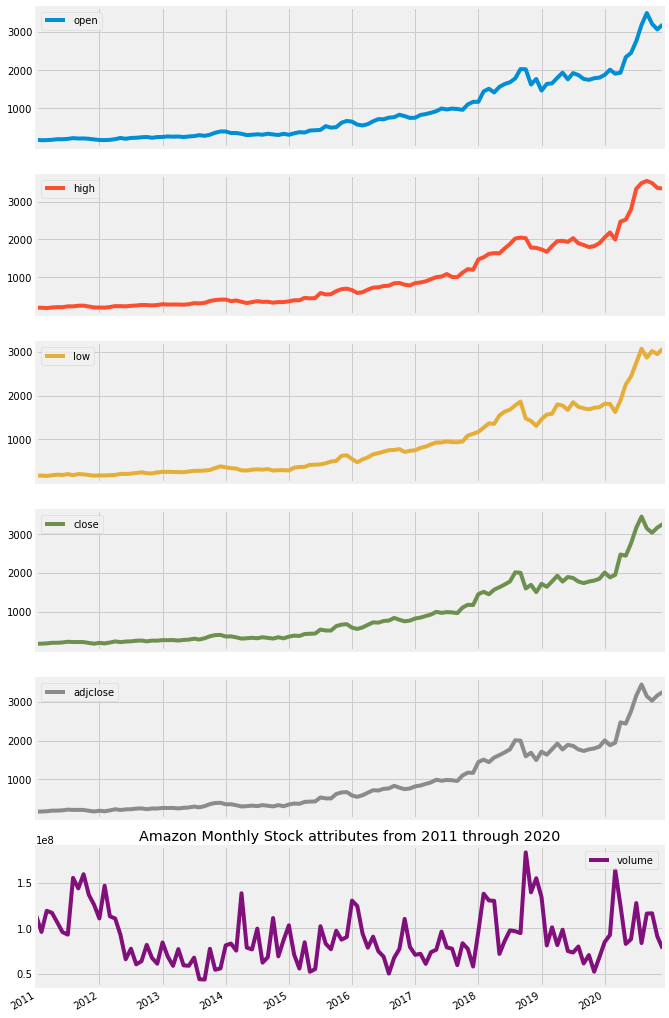

In [53]:
amazon_monthly.plot(subplots=True, figsize=(10,20))
plt.title('Amazon Monthly Stock attributes from 2011 through 2020')
plt.show()

In [55]:
#checking for date time index
amazon_daily.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=2517, freq=None)

### Using Timestamp

In [64]:
#creating a timestamp
timestamp = pd.Timestamp(2019, 4, 1, 12)
timestamp

Timestamp('2019-04-01 12:00:00')

In [65]:
#creating a period
period = pd.Period('2019-04-01')
period

Period('2019-04-01', 'D')

In [66]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [67]:
#converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2019-04-01 12:00', 'H')

In [68]:
#converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2019-04-01 00:00:00')

### Using Date_range

In [72]:
#creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/2019', end='12/31/2019')
dr1

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [73]:
#creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/2019', end='12/31/2019', freq='M')
dr2

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

In [75]:
#creating a datetimeindex without using startdate and using periods
dr3 = pd.date_range(end='12/31/2019', periods=8)
dr3

DatetimeIndex(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='D')

In [77]:
#creating a datetimeindex specifying start and end date, with periods
dr4 = pd.date_range(start='1/1/2019', end='12/31/2019', periods=3)
dr4

DatetimeIndex(['2019-01-01', '2019-07-02', '2019-12-31'], dtype='datetime64[ns]', freq=None)

### Resampling